In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from quant_met.bcs import graphene
from quant_met.configuration import Configuration
from quant_met import plotting

In [2]:
lattice_constant = np.sqrt(3)

basis = 0.5 * lattice_constant * np.array([[1, np.sqrt(3)],
                  [1, -np.sqrt(3)]])

bz_area = np.linalg.norm(np.cross(basis[0], basis[1]))
print(bz_area)

2.5980762113533156


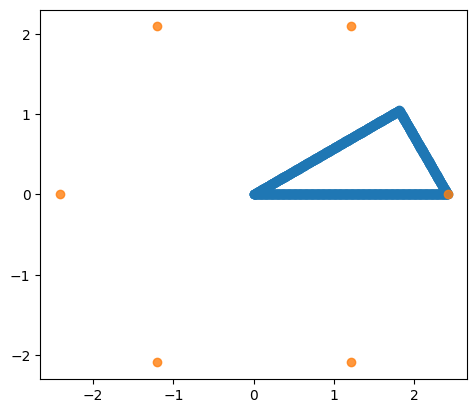

In [3]:
whole_path, whole_path_plot, ticks, labels = plotting.generate_bz_path(lattice_constant)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

BZ_path_plot = plotting.plot_into_bz(all_K_points, whole_path)

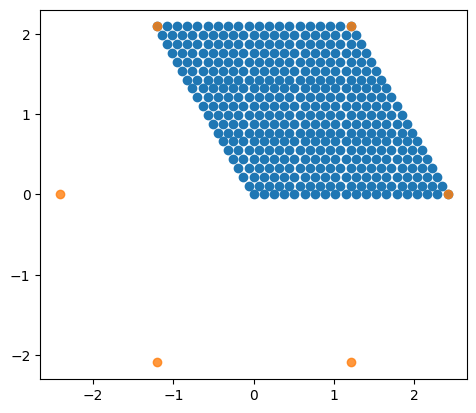

In [33]:
BZ_grid = graphene.generate_k_space_grid(20, 20, all_K_points[1], all_K_points[5])

BZ_grid_plot = plotting.plot_into_bz(all_K_points, BZ_grid)

           kx           ky  delta_1  delta_2
 0.000000e+00 0.000000e+00 0.102034 0.102034
 1.272842e-01 7.793907e-18 0.102034 0.102034
 2.545683e-01 1.558781e-17 0.102034 0.102034
 3.818525e-01 2.338172e-17 0.102034 0.102034
 5.091367e-01 3.117563e-17 0.102034 0.102034
 6.364208e-01 3.896954e-17 0.102034 0.102034
 7.637050e-01 4.676344e-17 0.102034 0.102034
 8.909892e-01 5.455735e-17 0.102034 0.102034
 1.018273e+00 6.235126e-17 0.102034 0.102034
 1.145557e+00 7.014517e-17 0.102034 0.102034
 1.272842e+00 7.793907e-17 0.102034 0.102034
 1.400126e+00 8.573298e-17 0.102034 0.102034
 1.527410e+00 9.352689e-17 0.102034 0.102034
 1.654694e+00 1.013208e-16 0.102034 0.102034
 1.781978e+00 1.091147e-16 0.102034 0.102034
 1.909262e+00 1.169086e-16 0.102034 0.102034
 2.036547e+00 1.247025e-16 0.102034 0.102034
 2.163831e+00 1.324964e-16 0.102034 0.102034
 2.291115e+00 1.402903e-16 0.102034 0.102034
 2.418399e+00 1.480842e-16 0.102034 0.102034
-6.364208e-02 1.102313e-01 0.102034 0.102034
 6.364208e

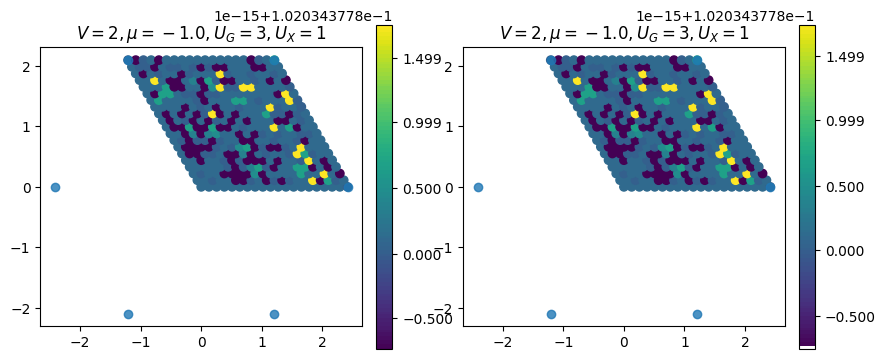

In [37]:
import time

config = Configuration(t_gr=1, t_x=0, a=lattice_constant, U_Gr=3, U_X=1, V=2, mu=-1.0, beta=1000000, filling=0.98)

start = time.time()
delta = graphene.solve_gap_equation(config, BZ_grid)
print(delta)
end = time.time()
print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
delta_interpolated = graphene.interpolate_gap(delta, whole_path)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

for delta, ax in zip(delta.data[['delta_1', 'delta_2']].to_numpy().T, axs):
#for delta, ax in zip([delta, delta], axs):
    ax.set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")
    plotting.scatter_into_bz(all_K_points, BZ_grid, delta, fig=fig, ax=ax)

In [28]:
delta_over_U = []

U_range = np.linspace(start=0, stop=6, num=10)

for U in U_range:
    config = Configuration(t_gr=1, t_x=0, a=lattice_constant, U_Gr=U, U_X=2.2, V=2, mu=-2, beta=100000, filling=0.98)

    start = time.time()
    #try:
    #delta, mu = graphene.solve_gap_equation(config, BZ_grid)
    delta = graphene.solve_gap_equation(config, BZ_grid)
    #print(delta)
    end = time.time()
    print(f'Time taken to solve the gap equation: {end - start:0.2f} seconds')
    #print(f"mu = {mu}")
    delta_over_U.append(delta.data.loc[0, 'delta_1'])
    #delta_over_U.append(delta)
    #except RuntimeError:
    #    delta_over_U.append(0)

Time taken to solve the gap equation: 0.80 seconds
Time taken to solve the gap equation: 19.32 seconds
Time taken to solve the gap equation: 9.54 seconds
Failed
Time taken to solve the gap equation: 116.51 seconds
Time taken to solve the gap equation: 42.20 seconds
Time taken to solve the gap equation: 1.17 seconds
Time taken to solve the gap equation: 0.93 seconds
Time taken to solve the gap equation: 1.17 seconds
Time taken to solve the gap equation: 1.44 seconds
Time taken to solve the gap equation: 1.63 seconds


Text(0.5, 0, 'U/t')

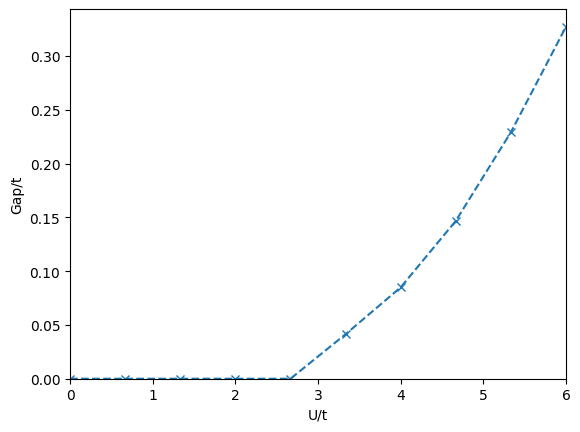

In [29]:
plt.plot(U_range, np.abs(delta_over_U), 'x--')
#plt.plot(U_range, np.array(U_range) / 2, alpha=0.5, color='black')
#plt.plot(U_range, np.array(U_range) - 2.13, alpha=0.5, color='black')
plt.ylim(bottom=0)
plt.xlim(left=0, right=6)
plt.ylabel("Gap/t")
plt.xlabel("U/t")

Text(0.5, 1.0, '$V = 2, \\mu = -1.0$')

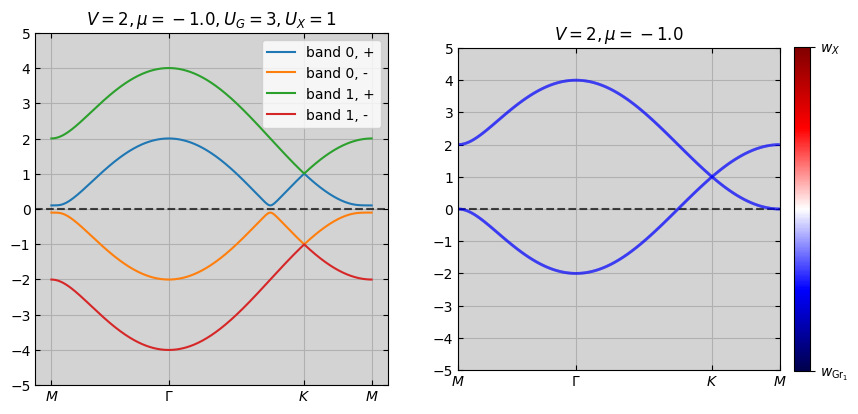

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(2*5, 5))

energies_on_bandpath, _ = graphene.generate_bloch(whole_path, config)

plotting.plot_bcs_bandstructure(energies_on_bandpath.T, delta_interpolated.data[['delta_1', 'delta_2']].to_numpy().T, whole_path_plot, ticks, labels, fig, axs[0])
axs[0].set_title(f"$V = {config.V}, \\mu = {config.mu}, U_G = {config.U_Gr}, U_X = {config.U_X}$")

band_structure = graphene.calculate_bandstructure(config, whole_path)
bands = band_structure[['band_1', 'band_2']].to_numpy().T
overlaps = band_structure[['wx_1', 'wx_2']].to_numpy().T
plotting.plot_nonint_bandstructure(bands, overlaps, whole_path_plot, ticks, labels, fig, axs[1])
axs[1].set_title(f"$V = {config.V}, \\mu = {config.mu}$")